In [28]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install psycopg2-binary
%pip install python-dotenv


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import seaborn as sns
import psycopg2
import os
from dotenv import load_dotenv

In [30]:
load_dotenv()

True

In [31]:
os.environ['USER_NAME'], os.environ['USER_PASSWORD']

('postgres', 'postgres')

In [32]:
# Connect to the database
dbConnection = psycopg2.connect(
    host="localhost",
    database="postgres",
    user=os.environ.get("USER_NAME"),
    password=os.environ.get("USER_PASSWORD")
)

In [33]:
query_kauf_kunde = "SELECT * FROM mart.fact_kauf fk JOIN mart.dim_kunde dk ON fk.dim_kunde_id = dk.dim_kunde_id;"

rows_kauf_kunde = sqlio.read_sql_query(query_kauf_kunde, dbConnection)
rows_kauf_kunde.head()

/var/folders/yp/hl_f_6ws5s5cwznw7srplkph0000gn/T/ipykernel_66347/932862334.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rows_kauf_kunde = sqlio.read_sql_query(query_kauf_kunde, dbConnection)


,dim_fahrzeug_id,dim_kunde_id,dim_kfz_id,kauf_kalender_datum,liefer_kalender_datum,kaufpreis,rabatt_pct,dim_kunde_id,kunde_account,vorname,nachname,geschlecht,geburtsdatum,wohnort,land
0,11,10,28,2020-08-12,2020-08-20,23000,6,10,K005,Charlie,Williams,m,1988-06-25,Wien,Österreich
1,12,8,25,2020-05-03,2020-05-08,28000,7,8,K003,Bob,Johnson,m,1980-03-10,Valmar,Mittelerde
2,13,6,26,2020-01-10,2020-01-15,25000,5,6,K001,John,Doe,m,1985-05-15,Stuttgart,Deutschland
3,13,8,23,2019-12-10,2019-12-15,31000,9,8,K003,Bob,Johnson,m,1980-03-10,Valmar,Mittelerde
4,13,9,16,2020-04-30,2020-05-05,28000,4,9,K002,Jane,Smith,w,1990-08-20,Stuttgart,Deutschland


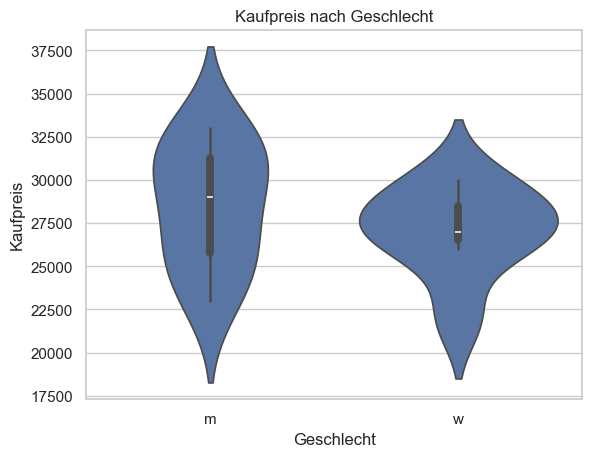

In [63]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="geschlecht", y="kaufpreis", data=rows_kauf_kunde)
ax.set_xlabel("Geschlecht")
ax.set_ylabel("Kaufpreis")
plt.title("Kaufpreis nach Geschlecht")
plt.show()

In [35]:
query_kauf_kunde_messung = """
SELECT * FROM mart.fact_kauf fk
	JOIN mart.dim_kunde dk 
		ON fk.dim_kunde_id = dk.dim_kunde_id
	JOIN mart.fact_messung fm
		ON fm.dim_fahrzeug_id = fk.dim_fahrzeug_id;
"""

rows_kauf_kunde_messung = sqlio.read_sql_query(query_kauf_kunde_messung, dbConnection)
rows_kauf_kunde_messung.head()

/var/folders/yp/hl_f_6ws5s5cwznw7srplkph0000gn/T/ipykernel_66347/895950313.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rows_kauf_kunde_messung = sqlio.read_sql_query(query_kauf_kunde_messung, dbConnection)


,dim_fahrzeug_id,dim_kunde_id,dim_kfz_id,kauf_kalender_datum,liefer_kalender_datum,kaufpreis,rabatt_pct,dim_kunde_id,kunde_account,vorname,nachname,geschlecht,geburtsdatum,wohnort,land,dim_fahrzeug_id,gesendet,empfangen,geschwindigkeit
0,12,8,25,2020-05-03,2020-05-08,28000,7,8,K003,Bob,Johnson,m,1980-03-10,Valmar,Mittelerde,12,2023-10-27 08:02:14+00:00,2023-10-27 10:02:16+00:00,12
1,12,8,25,2020-05-03,2020-05-08,28000,7,8,K003,Bob,Johnson,m,1980-03-10,Valmar,Mittelerde,12,2023-10-27 08:05:34+00:00,2023-10-27 10:05:40+00:00,3
2,12,8,25,2020-05-03,2020-05-08,28000,7,8,K003,Bob,Johnson,m,1980-03-10,Valmar,Mittelerde,12,2023-10-27 08:06:34+00:00,2023-10-27 10:06:35+00:00,1
3,12,8,25,2020-05-03,2020-05-08,28000,7,8,K003,Bob,Johnson,m,1980-03-10,Valmar,Mittelerde,12,2023-10-27 08:06:34+00:00,2023-10-27 10:06:36+00:00,4
4,12,8,25,2020-05-03,2020-05-08,28000,7,8,K003,Bob,Johnson,m,1980-03-10,Valmar,Mittelerde,12,2023-10-27 08:06:39+00:00,2023-10-27 10:06:39+00:00,5


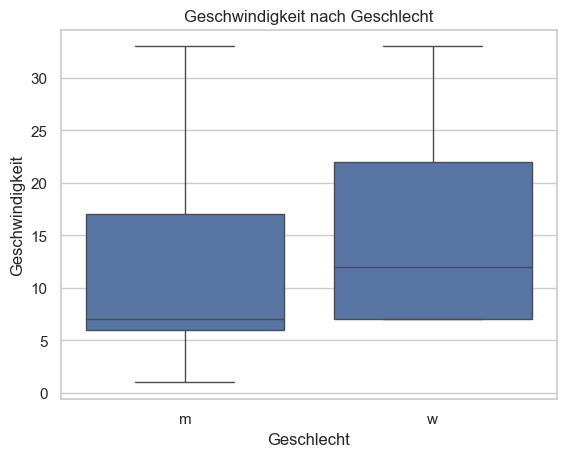

In [62]:
ax = sns.boxplot(x="geschlecht", y="geschwindigkeit", data=rows_kauf_kunde_messung)
ax.set_xlabel("Geschlecht")
ax.set_ylabel("Geschwindigkeit")
plt.title("Geschwindigkeit nach Geschlecht")
plt.show()

In [46]:
query_kauf_kunde_fahrzeug = """
SELECT * FROM mart.fact_kauf fk
	JOIN mart.dim_kunde dk 
		ON fk.dim_kunde_id = dk.dim_kunde_id
	JOIN mart.dim_fahrzeug df
		ON  fk.dim_fahrzeug_id = df.dim_fahrzeug_id;
"""

rows_kauf_kunde_fahrzeug = sqlio.read_sql_query(query_kauf_kunde_fahrzeug, dbConnection)
rows_kauf_kunde_fahrzeug.head()

/var/folders/yp/hl_f_6ws5s5cwznw7srplkph0000gn/T/ipykernel_66347/24581259.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rows_kauf_kunde_fahrzeug = sqlio.read_sql_query(query_kauf_kunde_fahrzeug, dbConnection)


,dim_fahrzeug_id,dim_kunde_id,dim_kfz_id,kauf_kalender_datum,liefer_kalender_datum,kaufpreis,rabatt_pct,dim_kunde_id,kunde_account,vorname,...,geschlecht,geburtsdatum,wohnort,land,dim_fahrzeug_id,fin,hersteller_code,hersteller_name,modell,produktionsdatum
0,11,10,28,2020-08-12,2020-08-20,23000,6,10,K005,Charlie,...,m,1988-06-25,Wien,Österreich,11,F1000005,WPO,Porsche,Macan,2017-12-01
1,12,8,25,2020-05-03,2020-05-08,28000,7,8,K003,Bob,...,m,1980-03-10,Valmar,Mittelerde,12,F1000003,SNT,Sachsenring Automobilwerke Zwickau GmbH,Trabant SUV,2018-10-10
2,13,6,26,2020-01-10,2020-01-15,25000,5,6,K001,John,...,m,1985-05-15,Stuttgart,Deutschland,13,F1000001,SNT,Sachsenring Automobilwerke Zwickau GmbH,Trabant 601 de luxe,2019-05-20
3,13,8,23,2019-12-10,2019-12-15,31000,9,8,K003,Bob,...,m,1980-03-10,Valmar,Mittelerde,13,F1000001,SNT,Sachsenring Automobilwerke Zwickau GmbH,Trabant 601 de luxe,2019-05-20
4,13,9,16,2020-04-30,2020-05-05,28000,4,9,K002,Jane,...,w,1990-08-20,Stuttgart,Deutschland,13,F1000001,SNT,Sachsenring Automobilwerke Zwickau GmbH,Trabant 601 de luxe,2019-05-20


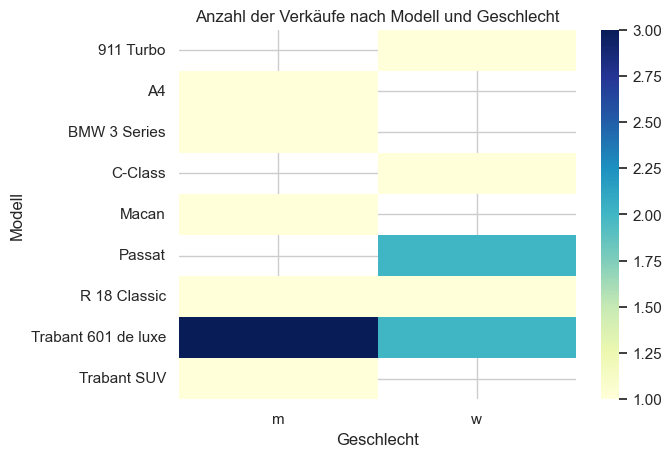

In [61]:
ax = sns.heatmap(rows_kauf_kunde_fahrzeug.groupby(["modell", "geschlecht"]).size().unstack(), cmap="YlGnBu")
ax.set_xlabel("Geschlecht")
ax.set_ylabel("Modell")
plt.title("Anzahl der Verkäufe nach Modell und Geschlecht")
plt.show()